# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Dataset Read-In

In [3]:
df = pd.read_csv('../../DATA/filled_toxicity_df.csv')

df.head()

,mol_id,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,HeavyAtoms,RingCount,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,TOX3021,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,16.0,2.0,...,1,0,0,0,0,1,0,0,0,0
1,TOX3020,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,15.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,TOX3024,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,21.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,TOX3027,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,20.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,TOX20800,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,11.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.set_index('mol_id', inplace=True)

df.head()

,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,HeavyAtoms,RingCount,AromaticProportion,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX3021,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,16.0,2.0,0.5625,...,1,0,0,0,0,1,0,0,0,0
TOX3020,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,15.0,2.0,0.4000,...,0,0,0,0,0,0,0,0,0,0
TOX3024,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,21.0,4.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
TOX3027,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,20.0,1.0,0.3000,...,0,0,0,0,0,0,0,0,0,0
TOX20800,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,11.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['MolecularWeight', 'LogP', 'TPSA', 'HBDonors', 'HBAcceptors',
       'RotatableBonds', 'FractionCSP3', 'HeavyAtoms', 'RingCount',
       'AromaticProportion', 'LogS_ESOL', 'PositiveCharges', 'NegativeCharges',
       'FormalCharge', 'AromaticRings', 'AromaticHeterocycles',
       'AliphaticRings', 'MolecularComplexity', 'MolarRefractivity',
       'Heteroatoms', 'HalogenCount', 'PhenolicGroups', 'NR-AR', 'NR-AR-LBD',
       'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
       'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'],
      dtype='object')

# Preprocessing

In [10]:
subset_0 = df[df['NR-AhR'] == 0].sample(n=845, random_state=42)

subset_1 = df[df['NR-AhR'] == 1]

balanced_df = pd.concat([subset_0, subset_1])

features_df = balanced_df[['MolecularWeight', 'LogP', 'TPSA', 'HBDonors', 'HBAcceptors',
       'RotatableBonds', 'FractionCSP3', 'HeavyAtoms', 'RingCount', 'LogS_ESOL',
       'FormalCharge', 'AromaticRings', 'AromaticHeterocycles',
       'AliphaticRings', 'MolecularComplexity', 'MolarRefractivity']]

target_df = balanced_df[['NR-AhR']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.33, random_state=42)

### ```scale_pos_weight```= ```(len(y_train_numeric) - sum(y_train_numeric)) / sum(y_train_numeric)```

In [12]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

smote_enn = SMOTEENN(random_state=42)

y_train_numeric = y_train['NR-AhR'].astype(int)

imbalance_ratio = (len(y_train_numeric) - sum(y_train_numeric)) / sum(y_train_numeric)

xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=(len(y_train_numeric) - sum(y_train_numeric)) / sum(y_train_numeric),  # imbalance handling
    random_state=42
)

pipeline = Pipeline([
    ('smote_enn', smote_enn),
    ('clf', xgb_clf)
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1],
    'clf__subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',  
    cv=5,
    verbose=2,
    n_jobs=1
)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)[:, 1]  # for AUC

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.8; total time=   0.1s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.8; total time=   0.1s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.8; total time=   0.1s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.8; total time=   0.2s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=0.8; total time=   0.2s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=1.0; total time=   0.1s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=1.0; total time=   0.2s
[CV] END clf__learning_rate=0.01, clf__max_depth=3, clf__n_estimators=100, clf__subsample=1.0; total time=   0.3s
[CV] END clf__learning_rat

[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, clf__subsample=0.8; total time=   0.4s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, clf__subsample=0.8; total time=   0.3s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, clf__subsample=0.8; total time=   0.4s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, clf__subsample=1.0; total time=   0.4s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, clf__subsample=1.0; total time=   0.4s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, clf__subsample=1.0; total time=   0.4s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, clf__subsample=1.0; total time=   0.6s
[CV] END clf__learning_rate=0.1, clf__max_depth=3, clf__n_estimators=200, clf__subsample=1.0; total time=   0.8s
[CV] END clf__learning_rate=0.1, clf__max_depth=5, clf__n_estimators=100, clf__subsample=0.8; to

In [13]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       283
           1       0.73      0.68      0.70       275

    accuracy                           0.72       558
   macro avg       0.72      0.72      0.72       558
weighted avg       0.72      0.72      0.72       558



In [14]:
from sklearn.metrics import roc_auc_score

y_proba = grid_search.predict_proba(X_test)[:, 1]  
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

AUC-ROC: 0.7959974301317058


## Running SHAP Interpretation

In [15]:
model = grid_search.best_estimator_

In [21]:
xgb_model = model.named_steps['clf']

In [22]:
import shap

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=model.feature_names_in_)
    
explainer = shap.TreeExplainer(xgb_model)

In [23]:
shap_values = explainer.shap_values(X_test)

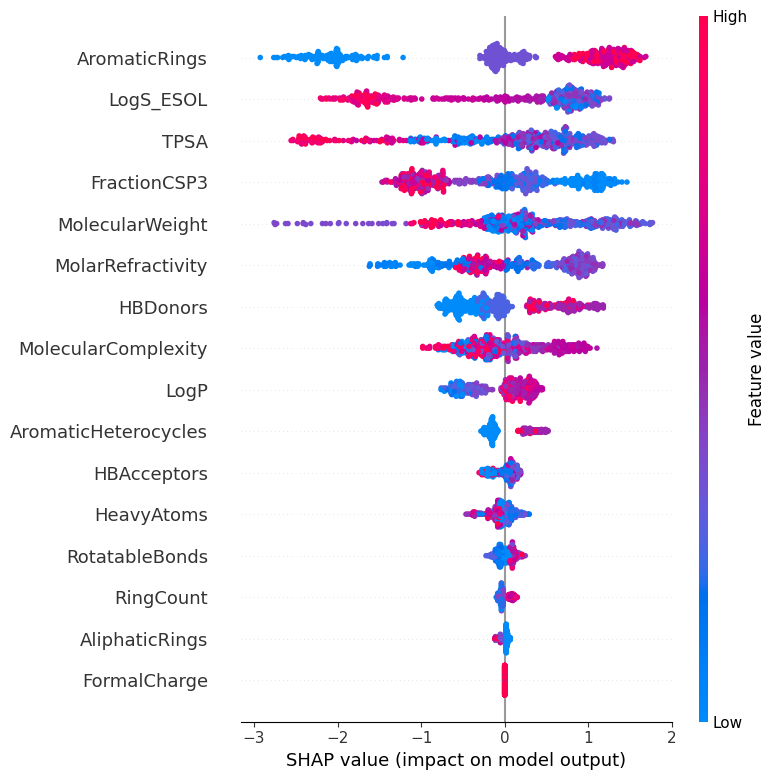

In [24]:
shap.summary_plot(shap_values, X_test, show=False)

## Saving the model as a .pkl File

In [26]:
import pickle

with open('../../Models/NR-AhR/xgboost_smoteen.pkl', 'wb') as file:
    pickle.dump(model, file)